# Data-driven script decisions: The Office

## Problema
### Descripción
The Office es una serie de televisión de comedia estadounidense, se estrenó en 2005 y dejó de transmitir en 2013.

### Objetivo
Lograr tomar decisiones en torno al guion de nuevos capítulos para maximizar su recepción por los usuarios a través de las calificaciones obtenidas en Internet Movie DataBase (IMDB). Buscamos lograr este objetivo a través de la aplicación de algoritmos de aprendizaje de máquina y otras técnicas computacionales.

### Problema de decisión
Si planteamos nuestros objetivos como un problema de decisión, 
 - **Tomador de decisiones**: en nuestro problema el tomador de decisiones puede ser un productor, el director o el guionista de un capítulo de una serie de televisión.
 - **Espacio de opciones**: un sinfín de posibilidades de guiones en donde pueden variar los personajes en cada escena, las líneas de cada personaje, el contenido de las líneas, etc.
 - **Espacio de eventos**: un número de 1 a 10 que define qué tan bien se recibió el capítulo por el usuario.
 - **Espacio de consecuencias**: ?

## Datos

En esta parte comenzaremos a utilizar código de Python para el análisis exploratorio de los datos. Comenzamos importando librerías útiles: *pandas* para organizar datos, *pyplot* y *seaborn* para graficarlos y *numpy* para procesarlos.

In [332]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

### Descripción
Los datos que tenemos a nuestra disposición fueron obtenidos de un __[Google Spreadsheet](https://docs.google.com/spreadsheets/d/18wS5AAwOh8QO95RwHLS95POmSNKA2jjzdt0phrxeAE0/edit#gid=747974534)__ que contiene información acerca de las líneas de cada capítulo como: las línea que se dice, el personaje que la dice y la escena, el capítulo y la temporada a la que pertenecen. Se presenta una muestra de los datos a continuación:

In [75]:
# Guardamos los datos originales en el DataFrame 'raw'
raw = pd.read_csv('the-office.csv', encoding='utf-8').set_index('id')
# Muestra de 5 elementos
raw.sample(5)

,season,episode,scene,line_text,speaker,deleted
id,,,,,,
21191,4,11,19,Aww!,Ryan,False
46565,8,3,32,And did your brains tell you to ruin these box...,Darryl,False
16080,3,22,4,"To what do I owe this great honor, David Wallace?",Michael,False
43007,7,15,20,Don't mind us. You keep working.,Erin,False
12638,3,10,57,Your hands.,Andy,False


### Análisis Exploratorio
Antes de realizar un análisis completo, comenzaremos por evaluar los datos que tenemos a nuestra disposición.

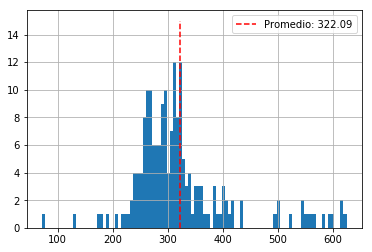

In [76]:
# Contar escenas por capítulo
raw.groupby(['season', 'episode'])['scene'].count().hist(bins=100)
plt.vlines(
    x=raw.groupby(['season', 'episode'])['scene'].count().mean(),
    linestyles='--',
    color='r',
    ymin=0,
    ymax=15,
    label="Promedio: {:.2f}".format(raw.groupby(['season', 'episode'])['scene'].count().mean()))
plt.legend()
plt.show()

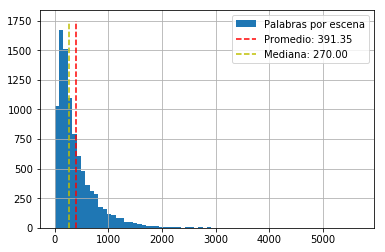

In [77]:
# Contar palabras por escena
aux = (
    raw
    .assign(words = lambda x: x.line_text.str.len())
    .groupby(['season', 'episode', 'scene'])['words']
    .sum()
)
aux.hist(bins=70, label='Palabras por escena')
plt.vlines(
    x=aux.mean(),
    linestyles='--',
    color='r',
    ymin=0,
    ymax=1750,
    label="Promedio: {:.2f}".format(aux.mean()))
plt.vlines(
    x=aux.median(),
    linestyles='--',
    color='y',
    ymin=0,
    ymax=1750,
    label="Mediana: {:.2f}".format(aux.median()))
plt.legend()
plt.show()

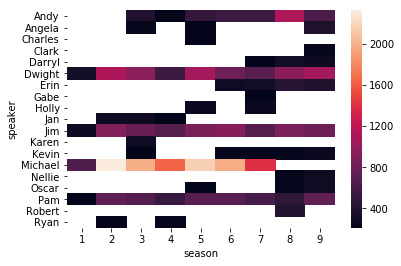

In [302]:
# Observar lineas por personaje (con más de 200 líneas) por temporada
sns.heatmap(
    raw
    .groupby(['speaker', 'season'])
    .count()
    .query('line_text > 200')
    .sort_values(by='speaker')
    .reset_index()
    .pivot(index='speaker',
          columns='season',
          values='line_text')
)
plt.show()

In [78]:
# Contamos lineas por personajes
raw.groupby(['speaker']).count().sort_values(by='line_text', ascending=False)

,season,episode,scene,line_text,deleted
speaker,,,,,
Michael,12137,12137,12137,12137,12137
Dwight,7529,7529,7529,7529,7529
Jim,6814,6814,6814,6814,6814
Pam,5375,5375,5375,5375,5375
Andy,3968,3968,3968,3968,3968
Kevin,1708,1708,1708,1708,1708
Angela,1695,1695,1695,1695,1695
Oscar,1490,1490,1490,1490,1490
Erin,1469,1469,1469,1469,1469


### Procesamiento

#### Limpieza de personajes

Como podemos observar, existen 797 "personajes" diferentes. Sin embargo, hay muchos errores y repeticiones como *Michael* y *MIchael* o personajes extras como *Man 1* y *Man 3* que no necesariamente son mismos personajes en diferentes escenas. A continuación limpiaremos el texto de la colummna *speaker* para reducir los errores.

In [362]:
# Comenzaremos a procesar, entonces creamos otro DataFrame
data = raw.copy()
# Cuenta inicial
len(data.speaker.unique())

797

Antes que nada, comenzamos por convertir los nombres de personajes a minúsculas (facilitará todo el trabajo) ya que no necesitamos que estén en mayúsculas y juntando "all" y "everyone".

In [363]:
data['speaker'] = data.speaker.str.lower()
data['speaker'] = data.speaker.str.replace("(everyone)|(office staff)|(the office)", "all")
len(data.speaker.unique())

780

Eliminamos puntuación.

In [364]:
data['speaker'] = data.speaker.str.replace("[\:\.]", "", regex=True)
len(data.speaker.unique())

777

Cuando un personaje contenga *&*, *and* o algún caracter de conjunto, será reemplazado por "multiple" y significa que en esa escena muchos de los personajes que participan hablan juntos.

In [365]:
matching = "( and )|(\&)|(\/)|(\, )"
data['speaker'] = np.where(data['speaker'].str.contains(matching, regex=True), "multiple", data['speaker'])
len(data.speaker.unique())

/Users/jpnegrete/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  


692

Utilizamos una librería para medir similaridad entre palabras llamada *difflib*. El método *SequenceMatcher* te da un radio de similitud entre dos palabras, este considera substrings iguales y la longitud de estas. La documentación completa puede ser encontrada __[aquí](https://docs.python.org/2/library/difflib.html#difflib.SequenceMatcher)__. Además, importamos *re* para poder hacer match con regex.

In [366]:
import difflib
import re

In [367]:
# Obtener lista de los personajes
speakers = list(data.speaker.unique())

In [308]:
# Obtener una lista de pers1/pers2 con similaridad de nombre
similarities = []
for i in range(len(speakers)):
    for j in range(i+1, len(speakers)):
        similarities.append([speakers[i],
                             speakers[j],
                             difflib.SequenceMatcher(None, speakers[i], speakers[j]).ratio()])
        
# Ordenar lista por similaridad
similarities = sorted(similarities, reverse=True, key=lambda value: value[2])

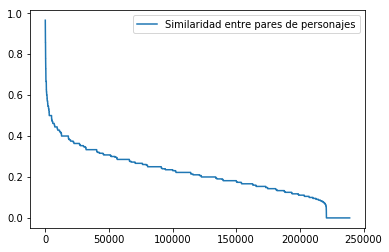

In [309]:
# Graficar similaridad
dictio = {i[0]+"/"+i[1]:i[2] for i in similarities}
plt.plot(range(0, len(dictio)), dictio.values(), label="Similaridad entre pares de personajes")
plt.legend()
plt.show()

Tenemos varios personajes que no son principales pero hay varios, por ejemplo: *Worker 1* y *Worker 2*. Comenzaremos quitándoles los números con Regex. Además, hay escenas donde se habla por teléfono y se agrega *\[on phone\]*, eliminaremos esto también.

In [368]:
# Regex para los números y teléfono
matching = "( \#[0-9])|( [0-9])|( \[on phone\])"
data['speaker'] = data['speaker'].str.replace(matching, '', regex=True)

len(data.speaker.unique())

648

Obtenemos una lista de los personajes principales, utilizando como criterio aquellos que tengan más de 50 lineas.

In [369]:
# Obtenemos lista
main = list(
    data
    .groupby(['speaker'], as_index=False)
    .count()
    .query('line_text > 50')
    .sort_values(by='line_text', ascending=False)
    ['speaker']
)
print(main)

['michael', 'dwight', 'jim', 'pam', 'andy', 'kevin', 'angela', 'oscar', 'erin', 'ryan', 'darryl', 'phyllis', 'kelly', 'jan', 'toby', 'stanley', 'meredith', 'holly', 'nellie', 'creed', 'gabe', 'robert', 'david', 'karen', 'clark', 'roy', 'deangelo', 'charles', 'pete', 'jo', 'multiple', 'all', 'david wallace', 'katy', 'carol', 'donna', 'todd packer', 'val', 'danny', 'josh', 'jessica', 'nate', 'packer', 'man', 'brian', 'mr brown']


Para cada personaje principal, reemplazamos todos los "personajes" que sean al menos un 75% iguales.

In [370]:
for character in main:
    for speaker in speakers:
        if(difflib.SequenceMatcher(None, speaker, character).ratio() > .75):
            data['speaker'] = np.where(data['speaker'] == speaker, character, data['speaker'])      
len(data.speaker.unique())

603

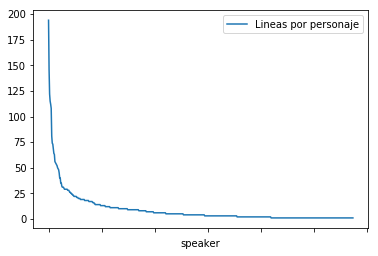

In [371]:
# Graficamos lineas por personajes
data.groupby(['speaker']).count().query('line_text < 200').sort_values(by='line_text', ascending=False)['line_text'].plot(label="Lineas por personaje")
plt.legend()
plt.show()

Se logró reducir o eliminar a casi 200 personajes que eran fruto de un error de los datoso redundancia. Cerca de **24.3% de los datos eran errores o redundancia**.

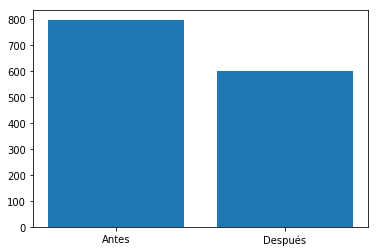

In [372]:
plt.bar(['Antes', 'Después'], [raw.speaker.unique().size, data.speaker.unique().size])
plt.show()

#### Limpieza de líneas
En los datos de líneas hay un error de encoding de caracteres especiales. Principalmente en la octava y novena temporada. Los limpiamos con replaces. Debido a que es inglés y hay un gran use de contracciones, la mayoría son comillas.

In [373]:
data.query('line_text.str.contains("���")', engine='python').line_text.count()

2559

In [374]:
data['line_text'] = data.line_text.str.replace("���s", "'s")
data['line_text'] = data.line_text.str.replace("���m", "'m")
data['line_text'] = data.line_text.str.replace("n���t", "n't")
data['line_text'] = data.line_text.str.replace("���ve", "'ve")
data['line_text'] = data.line_text.str.replace("���ll", "'ll")
data['line_text'] = data.line_text.str.replace("���re", "'re")
data['line_text'] = data.line_text.str.replace("���d", "'d")

# Lo que suponemos que no son comillas, simplemente son eliminados. Creemos que son -- o cosas por el estilo.
data['line_text'] = data.line_text.str.replace("���", "")

data.query('line_text.str.contains("���")', engine='python').line_text.count()

0

#### Unión con datos de calificación
Ahorita solo tenemos los datos de los scripts, es necesario unirlo con los datos de calificación de IMDB. Hacemos el join de los datos.

In [337]:
# Dataset que contiene información básica de series y películas
series = pd.read_csv('imdb-data/title.basics.tsv', sep='\t')

# Dataset que relaciona los capítulos con la serie a la que pertenecen
episodes = pd.read_csv('imdb-data/title.episode.tsv', sep='\t')

# Dataset de ratings por ID de IMDB
ratings = pd.read_csv('imdb-data/title.ratings.tsv', sep='\t')

In [343]:
series.sample(3)

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
256012,tt0266876,movie,Ratas de barrio,Ratas de barrio,0,1997,\N,\N,\N
3961875,tt6193778,tvEpisode,Episode #1.95,Episode #1.95,0,2001,\N,\N,Drama
2010729,tt2083569,tvEpisode,Episode #3.155,Episode #3.155,0,2011,\N,\N,"Comedy,Music,Talk-Show"


In [344]:
episodes.sample(3)

,tconst,parentTconst,seasonNumber,episodeNumber
100691,tt0591589,tt0318890,1,15
2837501,tt6999872,tt0277489,1,108
459950,tt1027542,tt0491611,2,5


In [345]:
ratings.sample(3)

,tconst,averageRating,numVotes
758839,tt4981300,8.8,208
627054,tt2433952,8.1,118
317391,tt0670281,8.9,37


In [342]:
# Encontrar el identificador para "The Office"
q = '(originalTitle.str.contains("The Office")) and (titleType == "tvSeries") and (startYear == "2005") and (endYear == "2013")'
series.query(q, engine='python')

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
371134,tt0386676,tvSeries,The Office,The Office,0,2005,2013,22,Comedy


Podemos notar que *tt0386676* es el identificador de la serie. Por lo que con esto podemos encontrar los capítulos en el segundo dataset.

In [348]:
# Buscamos los episodios pertenecientes a The Office únicamente
episodes = episodes.query('parentTconst == "tt0386676"', engine='python')
episodes.shape

(188, 4)

In [351]:
# Hacemos un left merge para asignar su calificación a cada capítulo y descartar las demás calificaciones
episodes = episodes.merge(rat, left_on='tconst', right_on='tconst', how='left')
episodes.sample(5)

,tconst,parentTconst,seasonNumber,episodeNumber,averageRating,numVotes
35,tt0894520,tt0386676,3,8,8.7,2049
86,tt1248753,tt0386676,5,9,8.8,1786
143,tt2071306,tt0386676,8,8,7.0,1369
148,tt2107510,tt0386676,8,9,7.8,1326
0,tt0664510,tt0386676,1,5,8.4,2726


In [352]:
# Hacemos un mapping the str a int
episodes['episodeNumber'] = episodes['episodeNumber'].map(int)
episodes['seasonNumber'] = episodes['seasonNumber'].map(int)

In [375]:
# Realizamos el merge de los datos de script con las calificaciones
data = data.merge(episodes, left_on=['season', 'episode'] , right_on=['seasonNumber', 'episodeNumber'], how='outer')

In [376]:
# Vemos si hubo errores en merge
data.isna().sum()

season           2
episode          2
scene            2
line_text        2
speaker          2
deleted          2
tconst           0
parentTconst     0
seasonNumber     0
episodeNumber    0
averageRating    0
numVotes         0
dtype: int64

In [377]:
# Tenemos calificaciones para dos capítulos. Probablemente error de capítulos especiales (a veces contados como 2)
data = data.dropna()
data.sample(3)

,season,episode,scene,line_text,speaker,deleted,tconst,parentTconst,seasonNumber,episodeNumber,averageRating,numVotes
3544,2.0,5.0,3.0,So it's a man?,pam,False,tt0664516,tt0386676,2,5,8.2,2203
31622,6.0,3.0,23.0,He's not a part of this. You know that.,jim,False,tt1487741,tt0386676,6,3,8.0,1501
24439,5.0,5.0,46.0,[setting stopwatch] Go.,darryl,False,tt1248749,tt0386676,5,5,8.2,1699


In [378]:
# Eliminamos toda la información (columnas) que no nos sirven
data = data.drop(['tconst', 'parentTconst', 'seasonNumber', 'episodeNumber'], axis=1)
data.sample(3)

,season,episode,scene,line_text,speaker,deleted,averageRating,numVotes
27083,5.0,14.0,2.0,[sighs and knocks on Michaels door],jim,False,8.3,1590
54482,9.0,7.0,7.0,The White Pages: Do you want it? No. Do you us...,dwight,False,7.7,1197
53957,9.0,5.0,16.0,[mumbled responses],hct,False,7.1,1296


# IGNORAR

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [90]:
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import confusion_matrix, f1_score

In [104]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

In [131]:
def organiza(x):
    return pd.Series(dict(texto = ' '.join(x['line_text']), 
                        pers = x['speaker'].value_counts().index[0],
                  rate = x['averageRating'].mean(),
                  votes = x['numVotes'].mean()))

In [141]:
prueba = pd.DataFrame(final.groupby(['season', 'episode'], as_index=False).apply(organiza))

In [137]:
prueba.sample(3)

,,texto,pers,rate,votes
season,episode,,,,
8.0,6.0,[Flickering Lights] Hey everybody it's closing...,Andy,7.8,1266.0
6.0,4.0,I'm sorry. You guys have probably noticed my s...,Michael,9.3,3155.0
9.0,19.0,[humming] What the hell? No. This is NOT happe...,Dwight,8.0,1252.0


In [181]:
X_train, X_test, y_train, y_test = train_test_split(
    prueba.drop(['rate', 'votes'], axis=1), # X
    prueba.rate,  # y
    test_size=0.2)

In [182]:
tf = TfidfVectorizer()
tf.fit(prueba.texto)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words=None, strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [183]:
X_train = tf.transform(X_train.texto)

In [184]:
X_test = tf.transform(X_test.texto)

In [160]:
forest = RandomForestRegressor(n_estimators=100)

In [169]:
grid_parametros = {
    'min_samples_split': [5, 10, 15]
}

forest_cv = GridSearchCV(forest, grid_parametros, cv=5, verbose=2, n_jobs=-1, scoring='neg_mean_squared_error')

In [185]:
forest_cv.fit(X_train, y_train)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:   34.0s finished
/Users/jpnegrete/miniconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'min_samples_split': [5, 10, 15]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='neg_mean_squared_error', verbose=2)

In [191]:
forest = RandomForestRegressor(n_estimators=100, min_samples_split=5, verbose=2, n_jobs=-1)

In [192]:
forest.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 100building tree 2 of 100

building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100


[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    1.4s


building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 75 of 100
building tree 76 of 100
building tree 77 of 100
building tree 78 of 100
building tree 79 of 100
building tree 80

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    3.7s finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=5,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
           oob_score=False, random_state=None, verbose=2, warm_start=False)

[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished


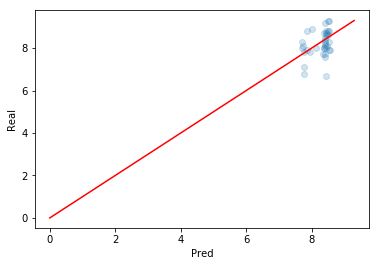

In [193]:
plt.scatter(forest.predict(X_test), y_test, alpha=0.2)
plt.xlabel('Pred')
plt.ylabel('Real')
plt.plot([0,y_test.max()], [0,y_test.max()], 'r')
plt.show()

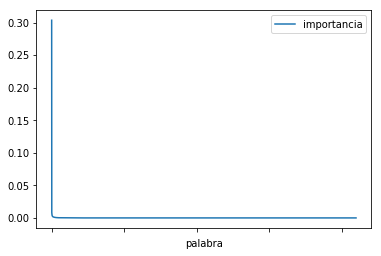

In [194]:
importancia = pd.DataFrame({
    'palabra': list(tf.vocabulary_.keys()),
    'importancia': forest.feature_importances_
}).sort_values(by='importancia', ascending=False)
importancia.plot(x='palabra', y='importancia')
plt.show()

In [195]:
importancia

,palabra,importancia
11651,eerie,0.303476
11396,debate,0.017073
8478,swallow,0.014720
17152,skinnier,0.012693
12193,painter,0.011286
18373,heartbreaking,0.010827
2725,nine,0.010381
10531,buddhist,0.009344
18367,memorials,0.008166
12348,ach,0.007795


In [198]:
final.query('line_text.str.contains("swallow")')

,id,season,episode,scene,line_text,speaker,deleted,averageRating,numVotes
12152,12153.0,3.0,9.0,19.0,You can't give paperclips to a baby. He could ...,Karen,False,8.2,2039
14226,14227.0,3.0,16.0,48.0,"I have a lot of big ideas, and the trick is to...",Michael,False,8.8,2266
22630,22631.0,5.0,1.0,6.0,Wait a minute. One more bite of eclair each. H...,Dwight,False,8.8,2193
22873,22874.0,5.0,1.0,60.0,I swallowed a tapeworm last night. It's going...,Kelly,False,8.8,2193
25246,25247.0,5.0,8.0,1.0,Are you swallowing them whole? You're eating ...,Angela,False,8.6,1790
25596,25597.0,5.0,9.0,4.0,"Wow, okay. Well... I swallowed all your ideas,...",Michael,False,8.8,1786
26729,26730.0,5.0,13.0,2.0,He's going to swallow is tongue.,Michael,False,9.6,5023
26731,26732.0,5.0,13.0,2.0,Open your mouth. Come on. Don't swallow it.,Michael,False,9.6,5023
29016,29017.0,5.0,20.0,35.0,"[muffled] No, I swallowed a crown.",Phyllis,False,8.3,1612
41097,41098.0,7.0,10.0,10.0,It's too big of a pill to swallow.,Kevin,False,8.3,1422
